<a href="https://colab.research.google.com/github/Mr-SuSeL/CoLab/blob/main/PierwszyDotykKerasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [ ]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


In [ ]:
import matplotlib.pyplot as plt

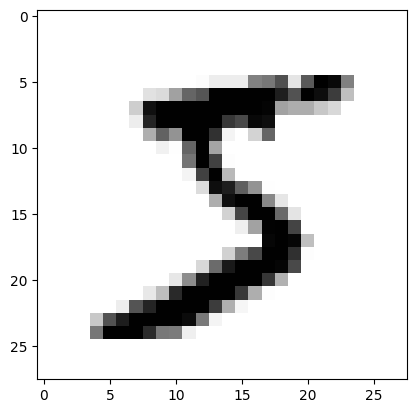

In [ ]:
plt.imshow(train_images[0], cmap = plt.cm.binary)

In [ ]:
print(train_labels[0])

5


In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'sigmoid'))


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [ ]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
test_labels = to_categorical(test_labels)

In [ ]:
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

In [ ]:
#Normalizacja 0-1

In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.3118 - accuracy: 0.9112
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1363 - accuracy: 0.9608
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9732
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.9800
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0528 - accuracy: 0.9850


In [ ]:
network.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0420 - accuracy: 0.9879
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0335 - accuracy: 0.9908
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9926
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0206 - accuracy: 0.9948
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9958
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0137 - accuracy: 0.9969
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9973
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0071 - accuracy: 0.9987
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0070 - accuracy: 0.9985

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0804 - accuracy: 0.9773


In [ ]:
network.save('digit_reader.model')

In [ ]:
print(test_loss)
print(test_acc)

0.08040526509284973
0.9772999882698059


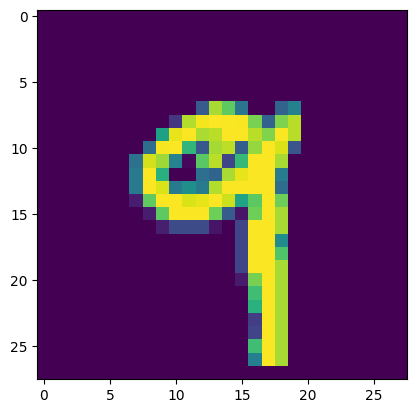

In [ ]:
img = test_images[322]
plt.imshow(img)

In [ ]:
print(test_labels[322])

9


In [ ]:
new_model = keras.models.load_model('digit_reader.model')

In [ ]:
# Najpierw normalizujemy fote
img = img.astype('float32') / 255
img = img.reshape((28*28))

In [ ]:
# Załadowanie zdjęcia do modelu
import numpy as np
result = new_model.predict(np.array([img]))

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(result)

[[8.1494568e-07 1.7619961e-04 7.4683150e-08 8.5242820e-01 5.0860750e-03
  4.0238209e-02 3.5973817e-12 1.0638604e-02 6.7974605e-02 1.0000000e+00]]


In [ ]:
print(np.argmax(result))

9
